In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
figuresDestination ='/home/ak/Documents/Research/Papers/figures/'

the effect of class distribution on classifier learning

In [3]:
from scipy import stats
# x2= df.from_dict(labelsDict)[differentLabelTypes[2]]
# x1= df.from_dict(labelsDict)[differentLabelTypes[1]]
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)
    
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

# quantile_plot(x1)
# quantile_plot(x2)
# _=plt.title('Quantile Plots for Labels')
#todo add legends and a 45% degree line

In [4]:
# location of data
passport = '/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/'
os.listdir(passport)

['IEER.L',
 'AAL.L',
 'AAL_AlternateLabels.pickle',
 'APF.L',
 'APF_AlternateLabels.pickle',
 'AV.L',
 'AV_AlternateLabels.pickle',
 'AZN.L',
 'AZN_AlternateLabels.pickle',
 'BARC.L',
 'BARC_AlternateLabels.pickle',
 'BATS.L',
 'BATS_AlternateLabels.pickle',
 'BLT.L',
 'BLT_AlternateLabels.pickle',
 'CCL.L',
 'CCL_AlternateLabels.pickle',
 'CEY.L',
 'CEY_AlternateLabels.pickle',
 'CNA.L',
 'CNA_AlternateLabels.pickle',
 'CPG.L',
 'CPG_AlternateLabels.pickle',
 'CPI.L',
 'CPI_AlternateLabels.pickle',
 'CRH.I',
 'DGE.L',
 'DMGOa.L',
 'ECM.L',
 'EGS.L',
 'GKN.L',
 'HSBA.L',
 'PRU.L',
 'PSON.L',
 'RB.L',
 'RBS.L',
 'RDSa.L',
 'RDSb.L',
 'REL.L',
 'RR.L',
 'RSA.L',
 'RTO.L',
 'SDR.L',
 'SGE.L',
 'SHP.L',
 'SMIN.L',
 'SPT.L',
 'STAN.L',
 'TSCO.L',
 'ULVR.L',
 'UU.L',
 'VOD.L']

picking a symbol and reading all the alternative labels data

In [6]:

ticker = 'BARC.L'
filename = "".join((passport,ticker.split(".")[0],'_AlternateLabels.pickle'))
with open(filename, 'rb') as handle:
    data =pickle.load(handle)


First lets deal with labels types:
1. take a list of all the data keys
this list(data.keys()) will give you a  list of dates to deal with - essentially it is a Symbol Date mapping 
2. lets pick the various data types: \

differentLabelTypes=data[listKeys[idx]].filter(like='label', axis=1).columns.values

###  label types ###

In [8]:
listKeys = list(data.keys())
# idx =3 
# differentLabelTypes=data[listKeys[idx]].filter(like='label', axis=1).columns.values # what are the different labels that we have
# count_of_labels = len(differentLabelTypes) # how many different labels do we have

# a bit redundant


In [38]:
labelPaths = ['LabelsAlternateOne','LabelsAlternateTwo','LabelsAlternateThree','LabelsAlternateFour','LabelsAlternateFive']
passportData = '/media/ak/My Passport/Data/FinDataReal/'
symbols = os.listdir(passportData+'Labels')
# [x for b in a for x in b] # Works fine
labelSymbolPaths = [os.path.join(passportData, label, symbol) for label in labelPaths for symbol in symbols]
labelSymbolDatePaths =  [os.path.join(labelSymbol, keyDate) for labelSymbol in labelSymbolPaths for keyDate in listKeys]

'/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/AAL.L/20170116'

In [42]:
# for path in labelSymbolDatePaths:
#     if not os.path.exists(path):
#         os.mkdir(path)
#     else:
#         print('continuing')
#         continue

# first dictionary will give you proportion of movement to no movement

In [9]:
from collections import defaultdict
labelsDict = defaultdict(dict) #create a structured dict that will have two keys to every value label/date 

for idx, key in enumerate(listKeys): #iterate through all the symbol-days
    df =pd.DataFrame(data[listKeys[idx]]).drop(columns=['label_PrMov__window_2__thres_arbitrary__0.5']) #read each day
    differentLabelTypes = df.filter(like='label', axis=1).columns.values 
    # make a list of all the labels- this is kind of rendundant given what I am doing
    for i, labelValue in enumerate(differentLabelTypes): #go through all the different labels
        try:
            labelsDict[differentLabelTypes[i]][key] =(df[differentLabelTypes[i]].value_counts()[1]+df[differentLabelTypes[i]].value_counts()[-1])/ df[differentLabelTypes[i]].value_counts()[0]
        except:
#             print('continuing')
            continue

In [10]:
idx = 1
dfTest = data[list(data.keys())[idx]]


# create a dict with the labels
myDict = {}
labels = [c for c in  dfTest.columns.tolist()  if 'label' in c]
info = [c for c in  dfTest.columns.tolist()  if 'label' not in c]
for label in labels:
    myDict[label]  =  dfTest[[label] + info]  

In [15]:
passportData = '/media/ak/My Passport/Data/FinDataReal/'
os.listdir(passportData)

['LLOY.L',
 'AAL.L',
 'APF.L',
 'AV.L',
 'AZN.L',
 'BARC.L',
 'BATS.L',
 'BLT.L',
 'CCL.L',
 'CEY.L',
 'CNA.L',
 'CPG.L',
 'IOG.L',
 'ITV.L',
 'KGF.L',
 'Labels',
 'LabelsAlternateFour',
 'LabelsAlternateOne',
 'LabelsAlternateThree',
 'LabelsAlternateTwo',
 'LAND.L',
 'LGEN.L',
 'MAB.L',
 'MKS.L',
 'NG.L',
 'PRU.L',
 'PSON.L',
 'RB.L',
 'RBS.L',
 'RDSa.L',
 'RDSb.L',
 'REL.L',
 'RR.L',
 'RSA.L',
 'RTO.L',
 'SDR.L',
 'SGE.L',
 'SHP.L',
 'SMIN.L',
 'SPT.L',
 'STAN.L',
 'TSCO.L',
 'ULVR.L',
 'UU.L',
 'VOD.L',
 'WPP.L']

In [20]:
np.shape(labels)

(5,)

In [ ]:
for idxKey, _ in enumerate(list(data.keys())):
    df= data[list(data.keys())[idxKey]]
    labels = [c for c in  df.columns.tolist()  if 'label' in c]
    info = [c for c in  df.columns.tolist()  if 'label' not in c]
    for idxLabel, label in labels:
        dfTest[[label] + info].to_csv()
    

In [61]:
labelSymbolDatePaths[0]
x = labelPaths
y =labels
labelDict = dict(zip(x, y))
labelDict[x[1]]
x[1]

'LabelsAlternateTwo'

In [56]:
labelSymbolDatePaths[0]

'/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/AAL.L/20170116'

In [62]:
for idxKey, dataKey in enumerate(list(data.keys())):
    for labelKey in list(labelDict.keys()):
        print(os.path.join(passportData, labelKey, ticker, dataKey))
        print(labelDict[labelKey])
#     print(dfTest[[label] + info].head(3) ) 

/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/BARC.L/20170116
label_MovAv__window_2__thres_arbitrary__0.0
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateTwo/BARC.L/20170116
label_MovAv__window_5__thres_arbitrary__0.1
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateThree/BARC.L/20170116
label_PrMov__window_2__thres_arbitrary__0.5
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateFour/BARC.L/20170116
label_EndPo__window_9__thres_arbitrary__0.1
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateFive/BARC.L/20170116
label_MovAv__window_20__thres_arbitrary__0.8
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateOne/BARC.L/20170117
label_MovAv__window_2__thres_arbitrary__0.0
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateTwo/BARC.L/20170117
label_MovAv__window_5__thres_arbitrary__0.1
/media/ak/My Passport/Data/FinDataReal/LabelsAlternateThree/BARC.L/20170117
label_PrMov__window_2__thres_arbitrary__0.5
/media/ak/My Passport/Data/FinDataReal/LabelsAlte

In [183]:
# e.g. 
myDict['label_MovAv__window_2__thres_arbitrary__0.0']

,label_MovAv__window_2__thres_arbitrary__0.0,TradedTime,TradedPrice,ReturnTradedPrice,Volume,Duration
0,1.0,08:00:05.127891,2.290000,0.000000e+00,239452.0,0.000000
1,0.0,08:00:10.576962,2.291875,8.184423e-04,1482.0,5.449071
2,1.0,08:00:12.533867,2.291820,-2.399811e-05,1601.0,1.956905
3,-1.0,08:00:25.536384,2.299500,3.345446e-03,428.0,13.002517
4,1.0,08:00:26.056950,2.294000,-2.394689e-03,2099.0,0.520566
5,1.0,08:00:26.563737,2.295808,7.877991e-04,1300.0,0.506787
6,-1.0,08:00:33.523483,2.297250,6.279376e-04,1150.0,6.959746
7,1.0,08:00:35.533210,2.296836,-1.801964e-04,11100.0,2.009727
8,0.0,08:00:35.543015,2.297220,1.670783e-04,2658.0,0.009805
9,0.0,08:00:36.552654,2.297290,3.053011e-05,221.0,1.009639


### this is a dictionary about relative movements

In [148]:
from collections import defaultdict
labelsDictUpDown = defaultdict(dict) #create a structured dict that will have two keys to every value label/date 

for idx, key in enumerate(listKeys): #iterate through all the symbol-days
    df =pd.DataFrame(data[listKeys[idx]]).drop(columns=['label_PrMov__window_2__thres_arbitrary__0.5']) #read each day
    differentLabelTypes = data[listKeys[idx]].filter(like='label', axis=1).columns.values 
    # make a list of all the labels- this is kind of rendundant given what I am doing
    for i, labelValue in enumerate(differentLabelTypes): #go through all the different labels
        try:
             labelsDictUpDown[differentLabelTypes[i]][key] =df[differentLabelTypes[i]].value_counts()[1]/df[differentLabelTypes[i]].value_counts()[-1]
    #    'defining movement that corresponds to a +1 label versus a -1 label'               
        except:
#             print('continuing')
            continue

In [149]:
# lets refactor the two dictionaries now

In [150]:
## this is general movement of proportions
labelProportions = df.from_dict(labelsDict)
#g = sns.FacetGrid(tests)
#sns.load_dataset("tips")
label_Proportions_DF = labelProportions.reset_index().rename(columns={"index": "Date"})
## this is the up-down movement
UpDownProportions = df.from_dict(labelsDictUpDown)
#g = sns.FacetGrid(tests)
#sns.load_dataset("tips")
UpDown_Proportions_DF = labelProportions.reset_index().rename(columns={"index": "Date"})

In [151]:
labels= UpDown_Proportions_DF.filter(like='label', axis=1).columns.values 

In [158]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText,ax):
    x= np.array(x.dropna())
    min_ylim, max_ylim = plt.ylim()
    min_xlim, max_xlim = plt.xlim()
    sns.distplot(x, fit=norm, kde=False, bins=20, ax=ax)
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2, label ='Median: {:.2f}'.format(np.median(x)))
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    ax.text(0.5, 0.5, 'StDev: {:.2f}'.format(x.std()), fontsize=15, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.legend()
    plt.tight_layout() 
   

In [159]:
# nrows = 2
# ncolumns =2 
# fig, axes = plt.subplots(nrows, ncolumns, figsize = (4* ncolumns, 4* nrows))
# for i in range(nrows):
#     for j in range(ncolumns):
#         axes[i][j].scatter(np.random.normal(size=100), np.random.normal(size=100)*j)

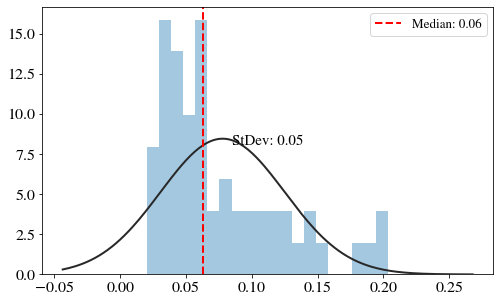

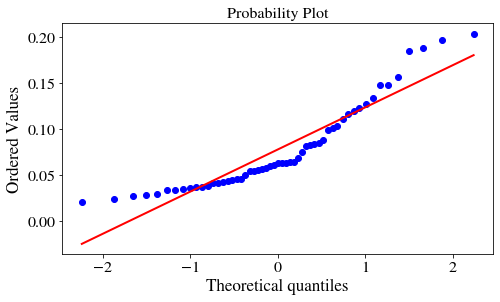

In [160]:
i=2
f, ax = plt.subplots()
x =UpDown_Proportions_DF[labels[i]]
text =labels[i]
price_based_histogram_labels( x, text, ax)
plt.show()
res = stats.probplot(x, plot=plt)


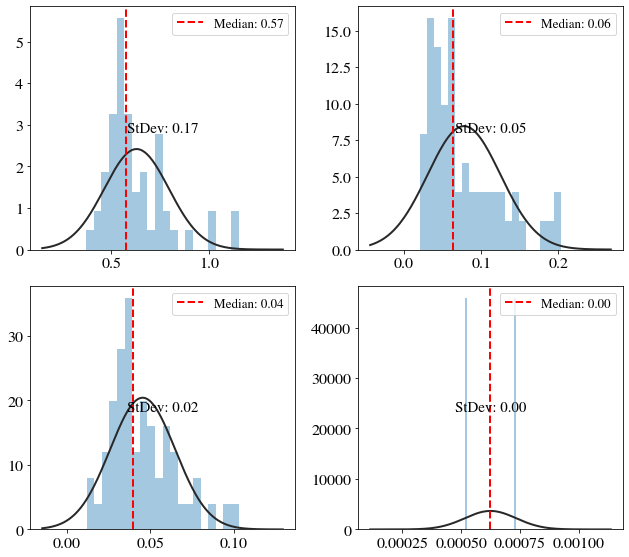

In [161]:
nrows = 2
ncolumns =2 
fig, axes = plt.subplots(nrows, ncolumns, figsize = (4.5* ncolumns, 4.0* nrows))
for i in range(nrows):
    for j in range(ncolumns):
        x =UpDown_Proportions_DF[labels[i+nrows*j]]
        text =labels[i+nrows*j]
        price_based_histogram_labels( x, text, ax= axes[i][j])
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + str(ticker )+'AlternateLabels'+ '.png', dpi=150)


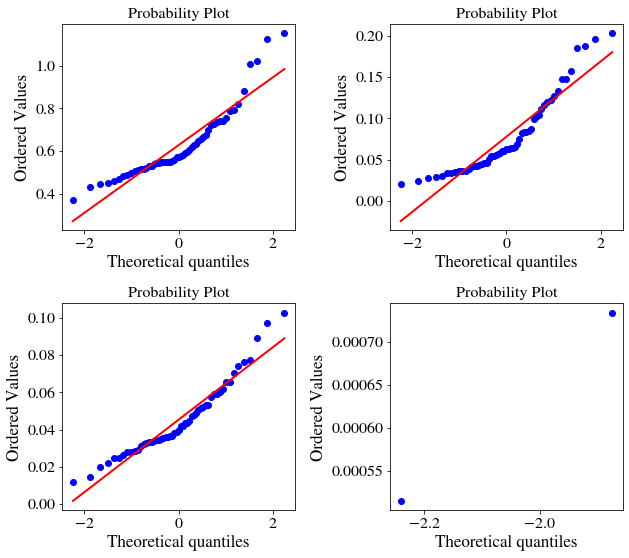

In [162]:
nrows = 2
ncolumns =2 
fig, axes = plt.subplots(nrows, ncolumns, figsize = (4.5* ncolumns, 4.0* nrows))
for i in range(nrows):
    for j in range(ncolumns):
        x =UpDown_Proportions_DF[labels[i+nrows*j]]
        text =labels[i+nrows*j]
        stats.probplot(x, plot=axes[i][j])

plt.savefig('/home/ak/Documents/Research/Papers/figures/' + str(ticker )+'QQPlotsAlternateLabels'+ '.png', dpi=150)


In [163]:
# for i in range(1,3):
#     x =UpDown_Proportions_DF[labels[i]]
#     text =labels[0]
#     price_based_histogram_labels(x, text)
#     plt.show()

## Dealing with Labels Directly ##

In [164]:
#need to store the labels !

In [165]:
# pd.concat([data[k].set_index(k) for k in list(data.keys())], axis =0)
df = pd.concat([pd.DataFrame({label: data[k][label].tolist() for label in differentLabelTypes}, index = [k]*len(data[k])) for k in list(data.keys())], axis =0)

In [30]:

df= dfimport seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    min_ylim, max_ylim = plt.ylim()
    ax = sns.distplot(x, fit=norm, kde=False, bins=20)
    _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)))
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(x.std()*0.5, max_ylim*0.1, 'StDev: {:.2f}'.format(x.std()))
    plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show().reset_index().rename(columns={"index": "Date"})
# from scipy import stats
# x2= df.from_dict(labelsDict)[differentLabelTypes[2]]
# x1= df.from_dict(labelsDict)[differentLabelTypes[1]]

In [36]:
labels =df.filter(like='label', axis=1).columns.values

In [45]:
dfs =[]
for idx, label in enumerate(labels):
    print(idx, label)
    df1 = df[['Date', labels[idx]]]
    df1Clean = pd.DataFrame()

    df1Clean['Date'] = df1['Date']
    df1Clean['LabelValue'] = df1[labels[idx]]
    df1Clean['LabelType'] = 'Label '+str(idx)
    dfs.append(df1Clean)

0 label_MovAv__window_2__thres_arbitrary__0.0
1 label_MovAv__window_5__thres_arbitrary__0.1
2 label_PrMov__window_2__thres_arbitrary__0.5
3 label_EndPo__window_9__thres_arbitrary__0.1
4 label_MovAv__window_20__thres_arbitrary__0.8


In [53]:
dfsConcat = pd.concat(dfs, axis =0)

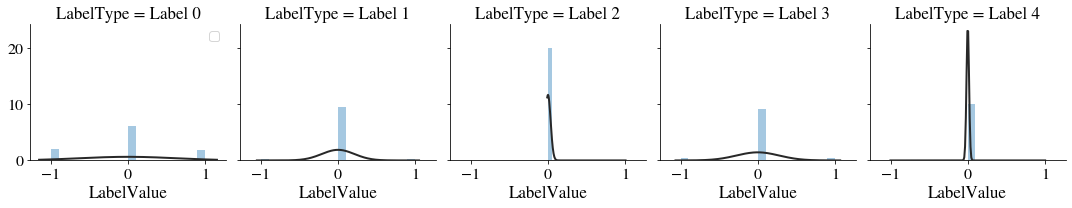

In [56]:
g = sns.FacetGrid(dfsConcat, col="LabelType",legend_out=False)
_=g.map(sns.distplot, "LabelValue", bins=20,fit=norm, kde=False)
g.add_legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


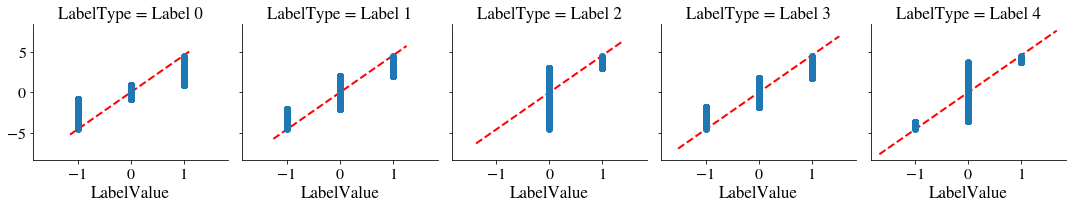

In [57]:
g = sns.FacetGrid(dfsConcat, col="LabelType",legend_out=False)
g.map(quantile_plot, "LabelValue")
plt.legend([],[], frameon=False)
# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
# 
# ax.set_prop_cycle(color=['red', 'green', 'blue'])
axes = g.fig.axes

for ax in axes:
    x = np.linspace(*ax.get_xlim())#*1.09
    y = np.linspace(*ax.get_ylim())#*1.09
    ax.plot(x, y,c="red", ls="--",zorder=0)
    ax. legend(loc='upper left', frameon=False) 
    

plt.show()

In [59]:
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    ax = sns.distplot(x, fit=norm, kde=False, bins=20)
    _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)))
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(x.std()*0.5, max_ylim*0.1, 'StDev: {:.2f}'.format(x.std()))
    plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show()

In [65]:
dfs[0].head(4)

,Date,LabelValue,LabelType
0,20170116,-1.0,Label 0
1,20170116,-1.0,Label 0
2,20170116,-1.0,Label 0
3,20170116,-1.0,Label 0


NameError: name 'max_ylim' is not defined

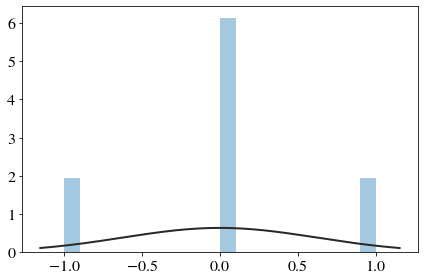

In [66]:
price_based_histogram_labels(dfs[0].LabelValue, 'Label 0')